# ***PLANT DISEASE CLASSIFICATION USING EFFICIENTNET MODEL:***


*   We have used ***EfficientNET model*** which is primarily a **deep neural network**. Pre-trained models are a common technique in deep learning, where networks trained on large datasets are fine-tuned for specific tasks, like plant disease classification.
*  Then we train it on our dataset and make predictions, confusion matrix, classification report etc which is a Machine learning concept.
## **About Dataset:**


*   I have used ***Plant Disease Dataset*** which contains total 1532 images of different plants. This dataset contains images for training, testing and validation purpose.
*  **Train Dataset** contains total 1322 images. Train Dataset conatins 3 subclasses named Healthy, Powdery and Rust. ***Healthy*** contains 458 images, ***Powdery*** conatins total 430 images and ***Rust*** contains 434 images.


*  **Test Dataset** contains total 150 images. Train Dataset conatins 3 subclasses named Healthy, Powdery and Rust. ***Healthy*** contains 50 images, ***Powdery*** conatins total 50 images and ***Rust*** contains 50 images.

*  **Validation Dataset** contains total 60 images. Train Dataset conatins 3 subclasses named Healthy, Powdery and Rust. ***Healthy*** contains 20 images, ***Powdery*** conatins total 20 images and ***Rust*** contains 20 images.




In [1]:
!pip install torchsummary

In [ ]:
# pip install timm

# Importing Libraries:
- Importing some important modules of torch such as optimizer, models, datasets, transformation etc.
- Importing sklearn library for data splitting, confusion matrix .
- Importing Numpy for arranging data into arrays.
- Importing Matplotlib for ploting graphs.

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import models
from torchsummary import summary
from torchvision import datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix, classification_report

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Dataset:

## Tranformation:


- ***transforms.Normalize:***  In tranformation, we do Normalization beacuse we want normalize pixel values of input images. We do normalization to ensure that all the input features are on same scale.
- ***transforms.Resize:*** As input images may be of different size to bring them to same size we use resize module. In this we resize them to a fixed size of 224 because MobileNET model expects input of this size.
- ***transforms.ToTensor:*** This converts the original image format to Pytorch tensor. Converting images to tensors allows you to perform mathematical operations on them.

In [3]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
transforms.Normalize((0.5,), (0.5,))])

## Loading Dataset:
- It is used to create datasets for training, testing, and validation, which can then be used with data loaders to feed data into your neural network for training and evaluation.
- ***datasets.ImageFolder:*** is a PyTorch utility that allows you to create datasets from image files organized in a specific folder structure.
- Plant Disease Dataset is organized into folder than in many subfolders which contains 3 classes named Healthy, Powdery, Rust.
- ***train_dir, test_dir, and val_dir:*** are directories containing your training, testing, and validation data.

In [4]:
train_dir= '/kaggle/input/plant-disease-recognition-dataset/Train/Train'
test_dir = '/kaggle/input/plant-disease-recognition-dataset/Test/Test'
val_dir= '/kaggle/input/plant-disease-recognition-dataset/Validation/Validation'
test_set = datasets.ImageFolder(root=test_dir, transform=transform)
train_set = datasets.ImageFolder(root=train_dir, transform=transform)
val_set = datasets.ImageFolder(root=val_dir, transform=transform)

## Counting Dataset:
- Here we are using ***class indices*** . They are often used to represent categories or classes in a dataset, and this mapping is essential for various tasks.
- This mapping is often stored as a Python dictionary, where the keys are the class names, and the values are the integer indices.
- Counter keep track of the number images in each class of train, test, and validation dataset.
- ***class_to_idx*** is an attribute of a PyTorch dataset object, specifically an instance of the datasets.ImageFolder. This takes to the ImageFolder where train, test , validation images are placed and the counts the images in each class and then print values with class name.

In [5]:
# Assuming you have three datasets: train_set, test_set, and val_set
# Get the class-to-indices mapping for each dataset
class_to_idx_train = train_set.class_to_idx
class_to_idx_test = test_set.class_to_idx
class_to_idx_val = val_set.class_to_idx

# Create dictionaries to store class counts for each dataset
class_count_train = {class_name: 0 for class_name in class_to_idx_train.keys()}
class_count_test = {class_name: 0 for class_name in class_to_idx_test.keys()}
class_count_val = {class_name: 0 for class_name in class_to_idx_val.keys()}

# Count the total number of images in each class within each dataset
for _, class_idx in train_set.samples:
    class_name = [key for key, value in class_to_idx_train.items() if value == class_idx][0]
    class_count_train[class_name] += 1

for _, class_idx in test_set.samples:
    class_name = [key for key, value in class_to_idx_test.items() if value == class_idx][0]
    class_count_test[class_name] += 1

for _, class_idx in val_set.samples:
    class_name = [key for key, value in class_to_idx_val.items() if value == class_idx][0]
    class_count_val[class_name] += 1

# Print the total number of images in each class for each dataset
for class_name, count in class_count_train.items():
    print("TRAIN DATASET:")
    print(f"Class '{class_name}': {count} images")

for class_name, count in class_count_test.items():
    print("TEST DATASET:")
    print(f"Class '{class_name}': {count} images")

for class_name, count in class_count_val.items():
    print("VALIDATION DATASET:")
    print(f"Class '{class_name}': {count} images")

TRAIN DATASET:
Class 'Healthy': 458 images
TRAIN DATASET:
Class 'Powdery': 430 images
TRAIN DATASET:
Class 'Rust': 434 images
TEST DATASET:
Class 'Healthy': 50 images
TEST DATASET:
Class 'Powdery': 50 images
TEST DATASET:
Class 'Rust': 50 images
VALIDATION DATASET:
Class 'Healthy': 20 images
VALIDATION DATASET:
Class 'Powdery': 20 images
VALIDATION DATASET:
Class 'Rust': 20 images


## Plotting Bar Graph For Dataset:

### For Training:
- Plotting bar graph for training. This takes 2 arguments 1 is class names which stores name of classes and second is image_count which stores the number of images.
-  Graph represents the number images in each class of the training dataset.


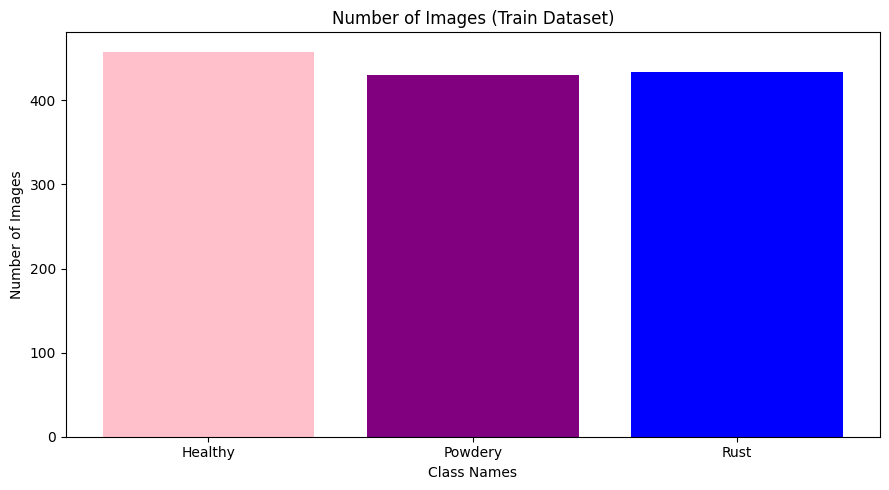

In [6]:
class_names= list(class_count_train.keys())
images_count= list(class_count_train.values())
# creating a bar graph
plt.figure(figsize=(9,5))
colors=['pink', 'purple', 'blue']
plt.bar(class_names, images_count, color=colors)

plt.xlabel('Class Names')
plt.ylabel('Number of Images')
plt.title('Number of Images (Train Dataset)')
plt.tight_layout()
plt.show()

### For Testing:
- Plotting bar graph for testing. This takes 2 arguments 1 is class names which stores name of classes and second is image_count which stores the number of images.
- Graph represents the number images in each class of the testing dataset.

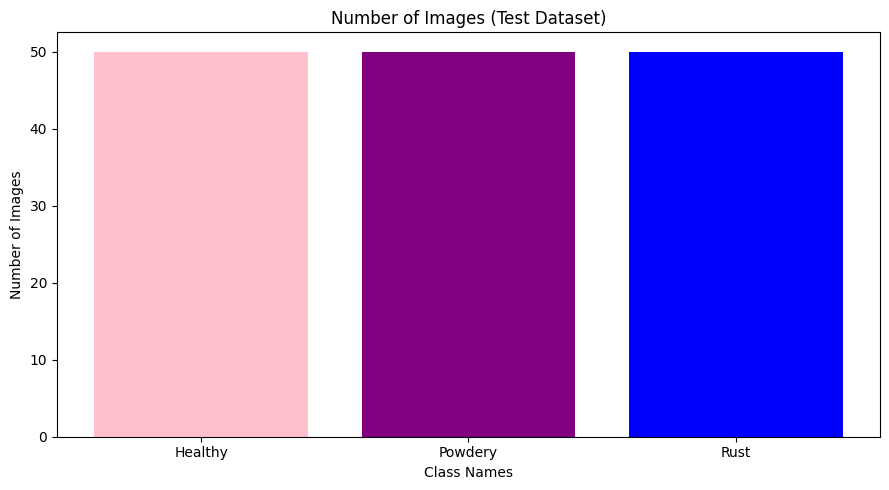

In [7]:
class_names= list(class_count_test.keys())
images_count= list(class_count_test.values())
# creating a bar graph
plt.figure(figsize=(9,5))
colors=['pink', 'purple', 'blue']
plt.bar(class_names, images_count, color=colors)

plt.xlabel('Class Names')
plt.ylabel('Number of Images')
plt.title('Number of Images (Test Dataset)')
plt.tight_layout()
plt.show()

### For Validation:
- Plotting bar graph for validation dataset. This takes 2 arguments 1 is class names which stores name of classes and second is image_count which stores the number of images.
- Graph represents the number images in each class of the validation dataset.

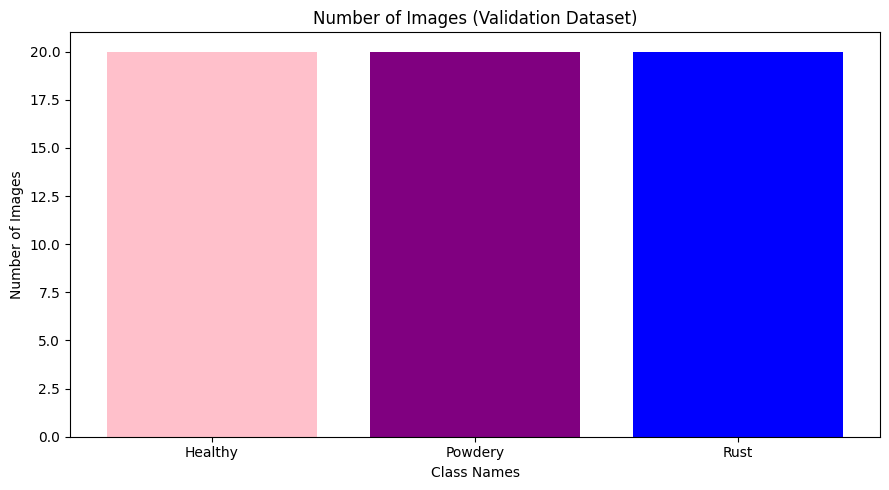

In [8]:
class_names= list(class_count_val.keys())
images_count= list(class_count_val.values())
# creating a bar graph
plt.figure(figsize=(9,5))
colors=['pink', 'purple', 'blue']
plt.bar(class_names, images_count, color=colors)

plt.xlabel('Class Names')
plt.ylabel('Number of Images')
plt.title('Number of Images (Validation Dataset)')
plt.tight_layout()
plt.show()

# Model:

## Installing Timm:
- This library is installed as i helps to load different pre_trained models.

In [9]:
# pip install timm


## Loading EfficentNET Model:
- In this section we are loading a pre_trained model named EfficientNET_b0.
- ***classifier:*** refers to the part of the neural network that's responsible for making ***predictions or decisions*** about the input data. The classifier takes the learned features from the earlier layers of the network and uses them to determine which class or category the input data belongs to.

In [10]:
import torch.nn as nn
import timm

# Load the EfficientNet-B0 model
model = timm.create_model('efficientnet_b0', pretrained=True)

num_classes = 3  # Replace 3 with the actual number of classes in your dataset

# Modify the classifier
num_features = model.classifier.in_features
model.classifier = nn.Linear(num_features, num_classes)

## Installing Torchsummary:
- Installing torchsummary to load summary of the model.

In [11]:
# !pip install torchsummary

## Checking GPU Availability and Print Summary:
- Moving model to GPU for efficient working of model and checking whether it is available or not.
- Loading summary of model as MobileNET model uses RGB channel so we use 3 and 224 hight and width of

In [12]:

# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Print model summary
summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
          Identity-2         [-1, 32, 112, 112]               0
              SiLU-3         [-1, 32, 112, 112]               0
    BatchNormAct2d-4         [-1, 32, 112, 112]              64
            Conv2d-5         [-1, 32, 112, 112]             288
          Identity-6         [-1, 32, 112, 112]               0
              SiLU-7         [-1, 32, 112, 112]               0
    BatchNormAct2d-8         [-1, 32, 112, 112]              64
            Conv2d-9              [-1, 8, 1, 1]             264
             SiLU-10              [-1, 8, 1, 1]               0
           Conv2d-11             [-1, 32, 1, 1]             288
          Sigmoid-12             [-1, 32, 1, 1]               0
    SqueezeExcite-13         [-1, 32, 112, 112]               0
           Conv2d-14         [-1, 16, 1

# Training:

## Btach Size and Creating Dataloaders:
- Btach size is set to 64.
- Data loaders are essential for efficiently loading and batching datasets during the training, validation, and testing phase.
- In ***trainloader***, train_set is passed which contains images for training purpose.
- In ***valloader***, val_set is passed which contains images for validation.
- In ***testloader***, test_set is passed which contains images for testing purpose.

In [13]:

# Create data loaders for training, validation, and testing
batch_size =64
trainloader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
valloader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=False)
testloader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)

## Number of Batches:
- Here we are calculating batch size of different dataloaders defined in our code like trainloader, testloader, valloader etc.
- It gives total batches of each dataset.

In [14]:

# Get the total number of batches
total_batches = len(trainloader)
print(f"Total number of batches: {total_batches}")
total_batches = len(testloader)
print(f"Total number of batches: {total_batches}")
total_batches = len(valloader)
print(f"Total number of batches: {total_batches}")

Total number of batches: 21
Total number of batches: 3
Total number of batches: 1


## Defining Optimizer and Loss Function:
- ***loss function*** is used to calculate the loss, which quantifies how well your model's predictions match the actual target values (ground truth) for a given batch of data.
- We have used ***Adam optimizer*** that adapts the learning rates for each parameter individually during training.

In [15]:

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

## Determining the Computing Device(GPU or CPU):

In [16]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Training Accuracy:
- We have defined a variable named ***training_losses*** which is empty and stores the value of calculated loss after each iterartion.
- ***num_epochs*** is set to 10 which means that 10 times whole data is feeded to the network.
- This loop calculates the training loss, validation loss, training accuracy and validation acccuracy using dataloaders.

In [17]:
from tqdm import tqdm

# Initialize an empty list to store training loss values
training_losses = []

# Training loop
num_epochs = 10

for epoch in tqdm(range(num_epochs)):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in tqdm(trainloader):
        inputs = inputs.cuda()
        labels = labels.cuda()

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = outputs.max(1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    # Calculate training loss and accuracy
    training_loss = running_loss / len(trainloader)
# Calculate training loss and accuracy
    epoch_training_loss = running_loss / len(trainloader)
    training_accuracy = correct_train / total_train

# Append the training loss for this epoch to the list
    training_losses.append(epoch_training_loss)

    # Validation
    model.eval()
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in tqdm(valloader):
            inputs = inputs.cuda()
            labels = labels.cuda()

            outputs = model(inputs)
            val_loss = criterion(outputs, labels)
            running_val_loss += val_loss.item()

            _, predicted = outputs.max(1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    # Calculate validation loss and accuracy
    validation_loss = running_val_loss / len(valloader)
    validation_accuracy = correct_val / total_val

    print(f'Epoch {epoch + 1}/{num_epochs}, '
          f'Training Loss: {training_loss:.4f}, '
          f'Training Accuracy: {training_accuracy * 100:.2f}%, '
          f'Validation Loss: {validation_loss:.4f}, '
          f'Validation Accuracy: {validation_accuracy * 100:.2f}%')

100%|██████████| 21/21 [03:14<00:00,  9.25s/it]

 10%|█         | 1/10 [03:22<30:26, 202.94s/it]

Epoch 1/10, Training Loss: 0.1868, Training Accuracy: 94.10%, Validation Loss: 0.0005, Validation Accuracy: 100.00%



100%|██████████| 21/21 [02:51<00:00,  8.18s/it]

 20%|██        | 2/10 [06:23<25:17, 189.73s/it]

Epoch 2/10, Training Loss: 0.0377, Training Accuracy: 98.71%, Validation Loss: 0.0192, Validation Accuracy: 98.33%



100%|██████████| 21/21 [02:50<00:00,  8.12s/it]

 30%|███       | 3/10 [09:21<21:31, 184.45s/it]

Epoch 3/10, Training Loss: 0.0318, Training Accuracy: 99.24%, Validation Loss: 0.0042, Validation Accuracy: 100.00%



100%|██████████| 21/21 [02:50<00:00,  8.11s/it]

 40%|████      | 4/10 [12:19<18:12, 182.00s/it]

Epoch 4/10, Training Loss: 0.0207, Training Accuracy: 99.32%, Validation Loss: 0.0080, Validation Accuracy: 100.00%



100%|██████████| 21/21 [02:50<00:00,  8.13s/it]

 50%|█████     | 5/10 [15:18<15:04, 180.81s/it]

Epoch 5/10, Training Loss: 0.0211, Training Accuracy: 99.55%, Validation Loss: 0.0050, Validation Accuracy: 100.00%



100%|██████████| 21/21 [02:48<00:00,  8.01s/it]

 60%|██████    | 6/10 [18:14<11:56, 179.17s/it]

Epoch 6/10, Training Loss: 0.0126, Training Accuracy: 99.77%, Validation Loss: 0.0003, Validation Accuracy: 100.00%



100%|██████████| 21/21 [02:47<00:00,  7.99s/it]

 70%|███████   | 7/10 [21:10<08:54, 178.04s/it]

Epoch 7/10, Training Loss: 0.0014, Training Accuracy: 100.00%, Validation Loss: 0.0005, Validation Accuracy: 100.00%



100%|██████████| 21/21 [02:50<00:00,  8.13s/it]

 80%|████████  | 8/10 [24:08<05:56, 178.23s/it]

Epoch 8/10, Training Loss: 0.0006, Training Accuracy: 100.00%, Validation Loss: 0.0002, Validation Accuracy: 100.00%



100%|██████████| 21/21 [02:53<00:00,  8.24s/it]

 90%|█████████ | 9/10 [27:10<02:59, 179.27s/it]

Epoch 9/10, Training Loss: 0.0002, Training Accuracy: 100.00%, Validation Loss: 0.0003, Validation Accuracy: 100.00%



100%|██████████| 21/21 [02:49<00:00,  8.06s/it]

100%|██████████| 10/10 [30:07<00:00, 180.78s/it]

Epoch 10/10, Training Loss: 0.0002, Training Accuracy: 100.00%, Validation Loss: 0.0002, Validation Accuracy: 100.00%


# Testing:

In [24]:
# Testing loop
model.eval()
running_test_loss = 0.0
correct_test = 0
total_test = 0

with torch.no_grad():
    for inputs, labels in (testloader):  # Assuming you have a testloader
        inputs = inputs.cuda()
        labels = labels.cuda()

        outputs = model(inputs)
        test_loss = criterion(outputs, labels)
        running_test_loss += test_loss.item()

        _, predicted = outputs.max(1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

# Calculate test loss and accuracy
test_loss = running_test_loss / len(testloader)
test_accuracy = correct_test / total_test

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy * 100:.2f}%')


Test Loss: 0.0427, Test Accuracy: 99.33%


# Predictons:

## Plotting Actual Images of Dataset:
- This code provides the actual images of the dataset. It randomly selects any 6 images from the dataset and plot those images with their class-names.

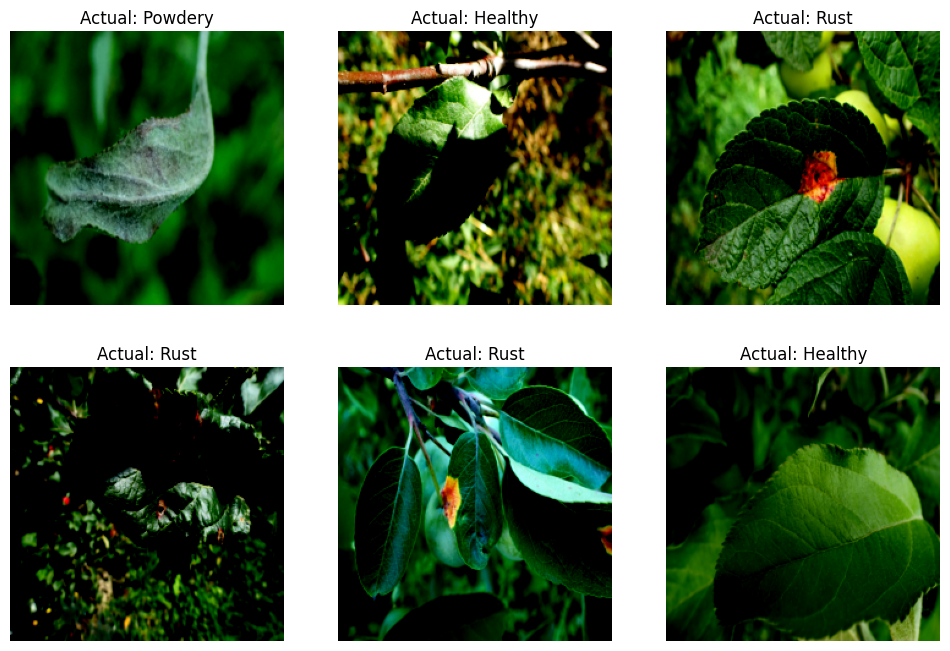

In [25]:
import random
import matplotlib.pyplot as plt

# Randomly select a subset of actual images and their labels for visualization
num_samples_to_display = 6
sample_indices = random.sample(range(len(val_set)), num_samples_to_display)

# Visualize randomly selected actual images and their labels
plt.figure(figsize=(12, 8))

for i, idx in enumerate(sample_indices):
    image, actual_label = val_set[idx]
    class_name_actual = class_names[actual_label]

    plt.subplot(2, 3, i + 1)
    plt.imshow(image.permute(1, 2, 0).numpy())
    plt.title(f"Actual: {class_name_actual}")
    plt.axis('off')

plt.show()

## Plotting Predicted Images:
- Here we are plotting predicted images that the model learns from actual data and make predictions.

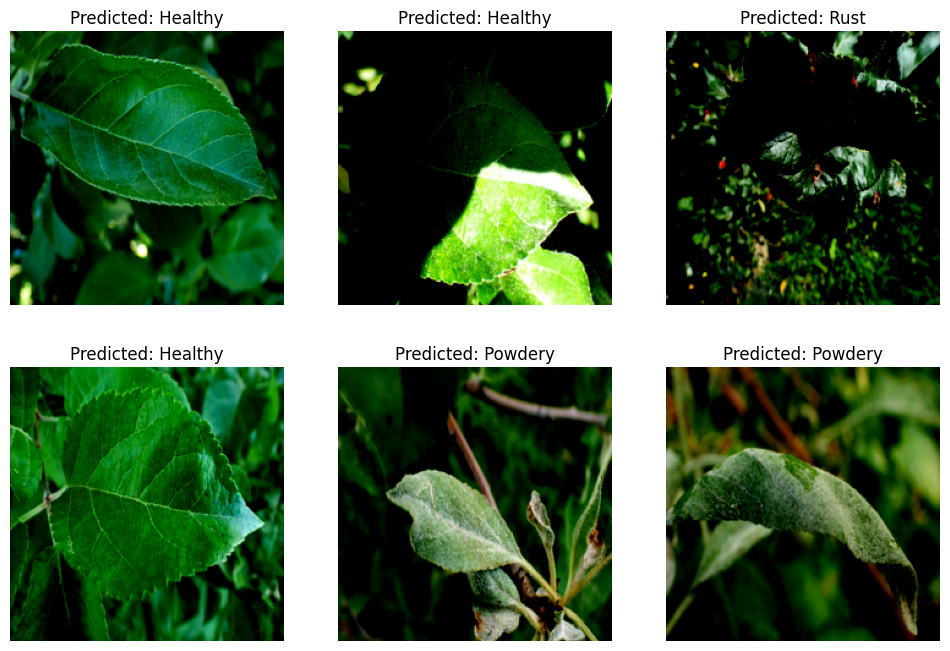

In [26]:
import random
import torch
import matplotlib.pyplot as plt

# Assuming you have already defined val_set, class_names, model, and valloader as mentioned in your original code

# Make predictions on the validation dataset
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Iterate over the validation data loader and accumulate predictions
predicted_labels = []
model.eval()  # Set the model to evaluation mode

for images, _ in valloader:
    with torch.no_grad():
        images = images.to(device)  # Move images to the GPU
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

    predicted_labels.extend(predicted.cpu().tolist())  # Move predictions back to CPU

# Randomly select a subset of predicted images and their labels for visualization
num_samples_to_display = 6
sample_indices = random.sample(range(len(val_set)), num_samples_to_display)

# Visualize randomly selected predicted images and their labels
plt.figure(figsize=(12, 8))

for i, idx in enumerate(sample_indices):
    if idx >= len(predicted_labels):
        print(f"Index {idx} is out of bounds for predicted_labels")
    else:
        image = val_set[idx][0].to(device)  # Move the image to the GPU
        predicted_label = predicted_labels[idx]
        class_name_predicted = class_names[predicted_label]

        plt.subplot(2, 3, i + 1)
        plt.imshow(image.permute(1, 2, 0).cpu().numpy())  # Move the image back to CPU for visualization
        plt.title(f"Predicted: {class_name_predicted}")
        plt.axis('off')

plt.show()


# Evaluation:

## Defining Function for Evaluation, Confusion Matrix and Classification Report:
- Here we are defining function to evaluate the model and then creating confusion matrix and classification report.

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

# Define a function to evaluate the model and create confusion matrix and classification report
def evaluate_model(model, dataloader):
    model.eval()
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for images, labels in dataloader:  # Use the function parameters images and labels
            images = images.cuda()  # Move images to GPU if necessary
            labels = labels.cuda()  # Move labels to GPU if necessary
            outputs = model(images)
            _, predictions = torch.max(outputs.data, 1)
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predictions.cpu().numpy())

    cm = confusion_matrix(all_labels, all_predictions)
    report = classification_report(all_labels, all_predictions)
    return cm, report



## Plotting Loss Graph:
- Using training_losses variable we plot a loss graph.

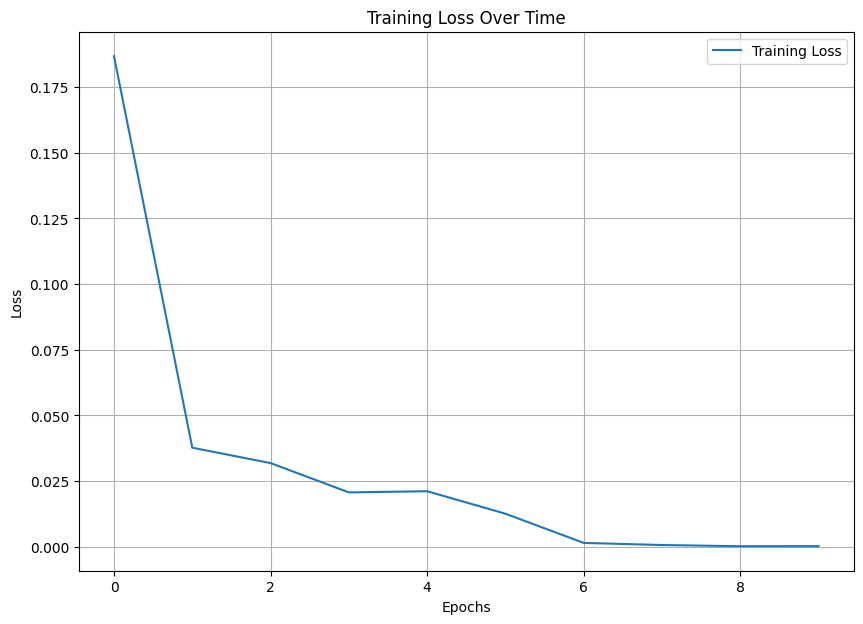

In [22]:

# Plot the training loss graph
plt.figure(figsize=(10, 7))
plt.plot(range(num_epochs), training_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()
plt.grid(True)
plt.show()

## Calculating Confusion Matrix:
- Here we are calculating the classification report for testloader and valloader and then displaying it.

In [23]:

# Calculate the confusion matrix and classification report for the validation set
val_confusion_matrix, val_classification_report = evaluate_model(model, valloader)
# Display the confusion matrices
print("Validation Confusion Matrix:")
print(val_confusion_matrix)

# Calculate the confusion matrix and classification report for the test set
test_confusion_matrix, test_classification_report = evaluate_model(model, testloader)
print("\nTest Confusion Matrix:")
print(test_confusion_matrix)

Validation Confusion Matrix:
[[20  0  0]
 [ 0 20  0]
 [ 0  0 20]]

Test Confusion Matrix:
[[50  0  0]
 [ 1 49  0]
 [ 0  0 50]]


## Displaying Classification Report:
- Displaying classification report for validation and test dataset.

In [27]:

print("\nValidation Classification Report:")
print(val_classification_report)
print("\nTest Classification Report:")
print(test_classification_report)


Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.98      0.99        50
           2       1.00      1.00      1.00        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



## Plotting Validation Confusion Matrix:
- Using seaborn library to create a heatmap to visualize a confusion matrix.
- A heatmap is a graphical representation of data where values in a matrix are represented as colors. It's an effective way to visualize tabular data, like a confusion matrix, by assigning colors to different values within the matrix.
- We have plot confusion matrix of valloader.

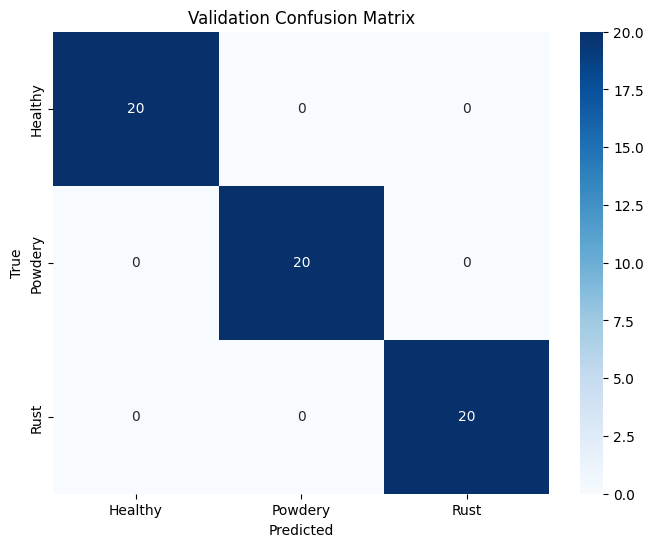

In [30]:

import seaborn as sns

# Define your class names as a list
class_names = ["Healthy","Powdery","Rust"]

# Define a function to plot a confusion matrix
def plot_confusion_matrix(confusion_matrix, class_names, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Plot the validation confusion matrix
plot_confusion_matrix(val_confusion_matrix, class_names, "Validation Confusion Matrix")

## Plotting Test Confusion Matrix:

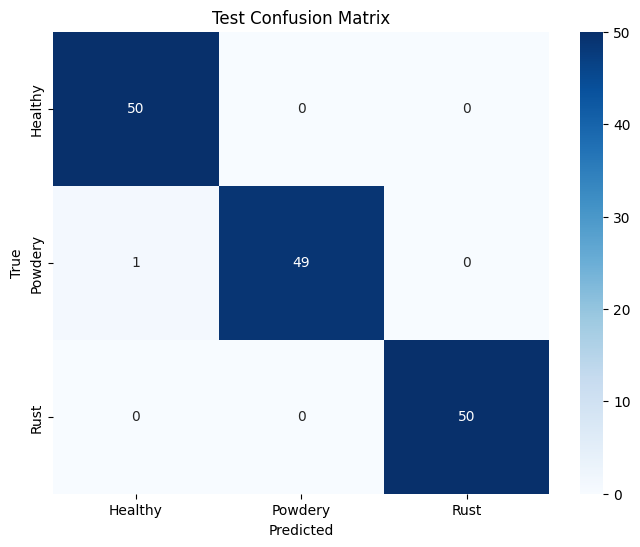

In [31]:

# Plot the test confusion matrix
plot_confusion_matrix(test_confusion_matrix, class_names, "Test Confusion Matrix")


## Interpret ML using SHAP

In [3]:
import torch

In [4]:
model=torch.load('/kaggle/input/modelefficient-net/project_save.pth')

In [5]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install efficientnet-pytorch

  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16427 sha256=aed57cf4daf79cfd3d10063fab52455804022306e5f1b31c5fa3c8c6a0c968cc
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
Successfully built efficientnet-pytorch
Note: you may need to restart the kernel to use updated packages.


In [7]:
import json
import numpy as np
import torchvision
import torch
import torch.nn as nn
import shap
from PIL import Image

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
class_names=["Healty","Powdery","Rust"]

In [10]:
model = torch.load("/kaggle/input/modelefficient-net/project_save.pth")

In [11]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [12]:
model.to(device)

EfficientNet(
  (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNormAct2d(
    32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
    (drop): Identity()
    (act): SiLU(inplace=True)
  )
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn1): BatchNormAct2d(
          32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): SiLU(inplace=True)
        )
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
          (act1): SiLU(inplace=True)
          (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
          (gate): Sigmoid()
        )
        (conv_pw): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNormAct2d(
      

In [13]:
import pandas as pd

In [14]:
import os
from PIL import Image
import numpy as np

# Path to the folder containing your resized images
image_folder = '/kaggle/input/filesdata'

# Define the target size (224x224 pixels)
target_size = (224, 224)

# Initialize an empty NumPy array to store the images
image_array = np.empty((0, *target_size, 3), dtype=np.uint8)

# Iterate through the files in the image folder
for filename in os.listdir(image_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Filter by image file extensions
        file_path = os.path.join(image_folder, filename)
        # Open the image using PIL
        image = Image.open(file_path)
        # Resize the image to the target size while preserving aspect ratio
        image = image.resize(target_size, Image.ANTIALIAS)
        # Convert the resized image to a NumPy array
        resized_image_array = np.array(image)
        # Append the resized image to the image_array
        image_array = np.append(image_array, [resized_image_array], axis=0)

# The 'image_array' now contains all the images as a (50, 224, 224, 3) NumPy array
X=image_array
print(X.shape)


ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.


(7, 224, 224, 3)


In [15]:
# Prepare data transformation pipeline

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

def nhwc_to_nchw(x: torch.Tensor) -> torch.Tensor:
    if x.dim() == 4:
        x = x if x.shape[1] == 3 else x.permute(0, 3, 1, 2)
    elif x.dim() == 3:
        x = x if x.shape[0] == 3 else x.permute(2, 0, 1)
    return x

def nchw_to_nhwc(x: torch.Tensor) -> torch.Tensor:
    if x.dim() == 4:
        x = x if x.shape[3] == 3 else x.permute(0, 2, 3, 1)
    elif x.dim() == 3:
        x = x if x.shape[2] == 3 else x.permute(1, 2, 0)
    return x


transform= [
    torchvision.transforms.Lambda(nhwc_to_nchw),
    torchvision.transforms.Lambda(lambda x: x*(1/255)),
    torchvision.transforms.Normalize(mean=mean, std=std),
    torchvision.transforms.Lambda(nchw_to_nhwc),
]

inv_transform= [
    torchvision.transforms.Lambda(nhwc_to_nchw),
    torchvision.transforms.Normalize(
        mean = (-1 * np.array(mean) / np.array(std)).tolist(),
        std = (1 / np.array(std)).tolist()
    ),
    torchvision.transforms.Lambda(nchw_to_nhwc),
]

transform = torchvision.transforms.Compose(transform)
inv_transform = torchvision.transforms.Compose(inv_transform)

In [16]:
def predict(img: np.ndarray) -> torch.Tensor:
    img = nhwc_to_nchw(torch.Tensor(img))
    img = img.to(device)
    output = model(img)
    return output

In [17]:
X.shape

(7, 224, 224, 3)

In [18]:

# Check that transformations work correctly
Xtr = transform(torch.Tensor(X))
# print(Xtr)
out = predict(Xtr[:])
classes = torch.argmax(out, axis=1).cpu().numpy()
print(f'Classes: {classes}: {np.array(class_names)[classes]}')

Classes: [2 0 1 0 0 2 1]: ['Rust' 'Healty' 'Powdery' 'Healty' 'Healty' 'Rust' 'Powdery']


In [30]:
topk = 4
batch_size = 50
n_evals = 10000

# define a masker that is used to mask out partitions of the input image.
masker_blur = shap.maskers.Image("blur(128,128)", Xtr[0].shape)

# create an explainer with model and image masker
explainer = shap.Explainer(predict, masker_blur, output_names=class_names)

# feed only one image
# here we explain two images using 100 evaluations of the underlying model to estimate the SHAP values
shap_values = explainer(Xtr[3:4], max_evals=n_evals, batch_size=batch_size,
                        outputs=shap.Explanation.argsort.flip[:topk])

  0%|          | 0/9998 [00:00<?, ?it/s]

Partition explainer: 2it [00:24, 24.49s/it]               


In [31]:
(shap_values.data.shape, shap_values.values.shape)


(torch.Size([1, 224, 224, 3]), (1, 224, 224, 3, 3))

In [32]:
shap_values.data = inv_transform(shap_values.data).cpu().numpy()[0]
shap_values.values = [val for val in np.moveaxis(shap_values.values[0],-1, 0)]

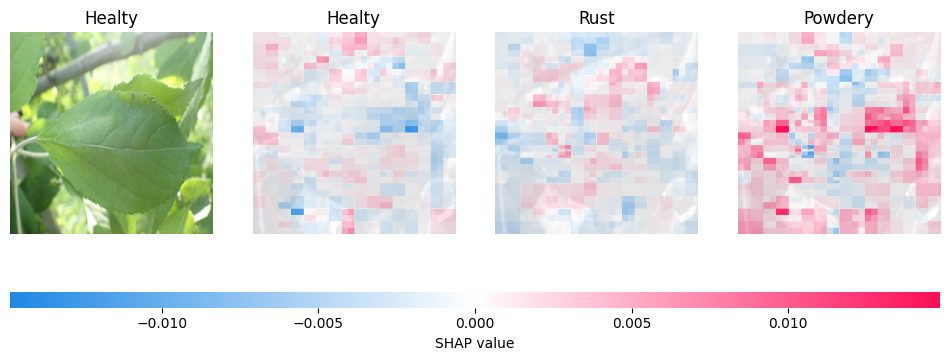

In [33]:
shap.image_plot(shap_values=shap_values.values,
                pixel_values=shap_values.data,
                labels=shap_values.output_names,
                true_labels=[class_names[0]])

In [23]:
# define a masker that is used to mask out partitions of the input image.
masker_blur = shap.maskers.Image("blur(128,128)", Xtr[0].shape)

# create an explainer with model and image masker
explainer = shap.Explainer(predict, masker_blur, output_names=class_names)

# feed only one image
# here we explain two images using 100 evaluations of the underlying model to estimate the SHAP values
shap_values = explainer(Xtr[1:9], max_evals=n_evals, batch_size=batch_size,
                        outputs=shap.Explanation.argsort.flip[:topk])

  0%|          | 0/9998 [00:00<?, ?it/s]

Partition explainer:  17%|█▋        | 1/6 [00:00<?, ?it/s]

  0%|          | 0/9998 [00:00<?, ?it/s]

Partition explainer:  50%|█████     | 3/6 [00:49<00:37, 12.46s/it]

  0%|          | 0/9998 [00:00<?, ?it/s]

Partition explainer:  67%|██████▋   | 4/6 [01:15<00:36, 18.07s/it]

  0%|          | 0/9998 [00:00<?, ?it/s]

Partition explainer:  83%|████████▎ | 5/6 [01:40<00:20, 20.55s/it]

  0%|          | 0/9998 [00:00<?, ?it/s]

Partition explainer: 100%|██████████| 6/6 [02:04<00:00, 21.71s/it]

  0%|          | 0/9998 [00:00<?, ?it/s]

Partition explainer: 7it [02:28, 24.82s/it]                       


In [24]:
(shap_values.data.shape, shap_values.values.shape)

(torch.Size([6, 224, 224, 3]), (6, 224, 224, 3, 3))

In [25]:
shap_values.data = inv_transform(shap_values.data).cpu().numpy()
shap_values.values = [val for val in np.moveaxis(shap_values.values,-1, 0)]

In [26]:
(shap_values.data.shape, shap_values.values[0].shape)

((6, 224, 224, 3), (6, 224, 224, 3))

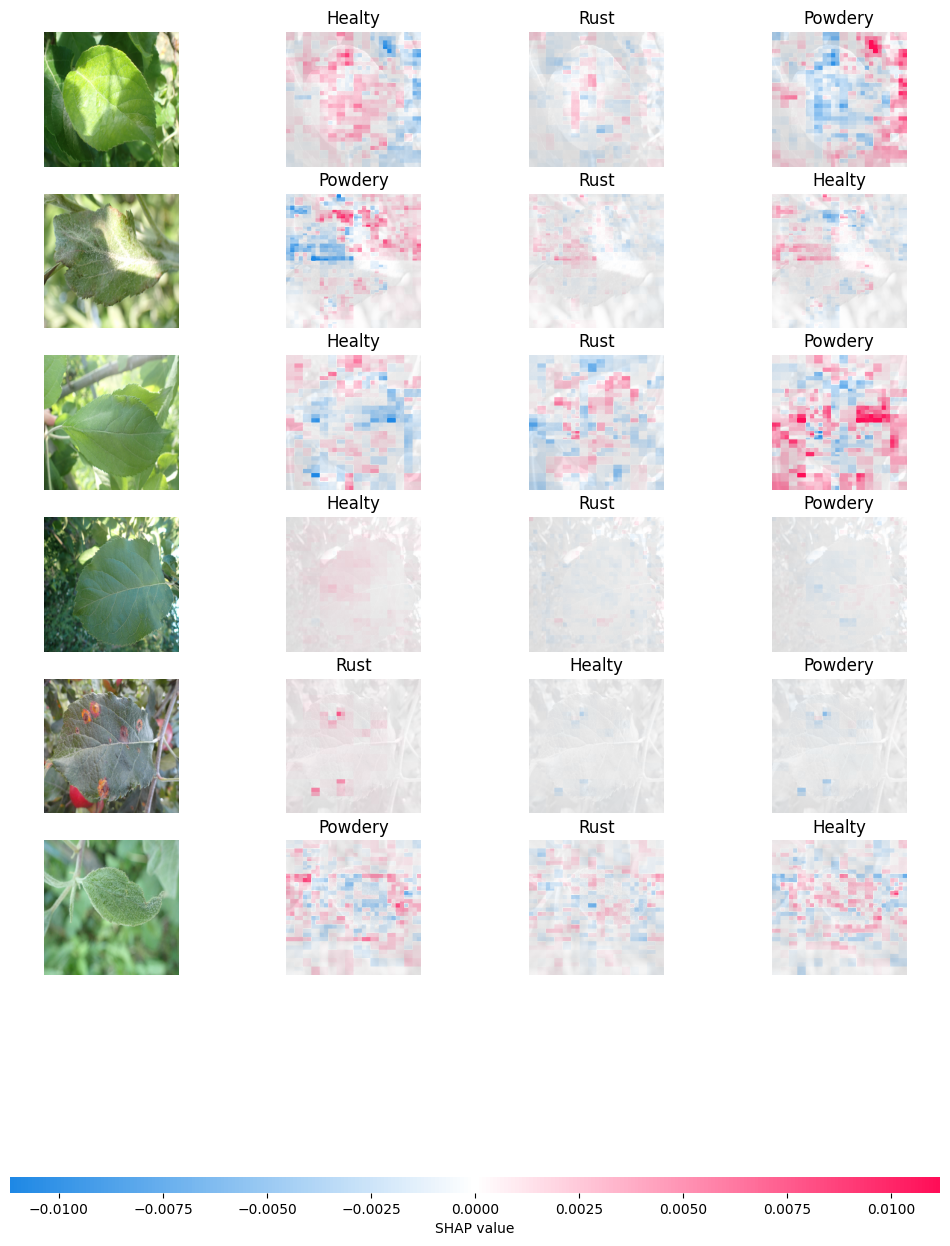

In [27]:
shap.image_plot(shap_values=shap_values.values,
                pixel_values=shap_values.data,
                labels=shap_values.output_names)